# Entropia

## Fundamentos Teóricos

<font size = "4"> Entropia é a função termodinâmica que aponta o sentido de uma transformação espontânea e é definida a partir de uma transformação reversível, onde 
    
$$ dS = \frac{dQ_{rev}}{T} $$
    
nesta equação $dQ_{rev}$ é a quantidade calor trocado em uma transformação reversível. A entropia só depende do estado final e inicial do sistema. Logo, em uma transformação cíclica $ \Delta S = 0$. 
    
A variação da entropia pode ser cálculada para diferentes transformações reversíveis:
* **Mudança de fase reversível a T e p constantes** : $ dS = \frac{\Delta H}{T} $
* **Aquecimento reversível a p constante sem mudança de fase** : $ dS = \frac{Cp}{T} dT $
* **Transformação reversível em função de T e V** : $ dS = \frac{Cv}{T} dT + \frac{\alpha}{\kappa} dV $
* **Transformação reversível em função de T e p** : $ dS = \frac{Cp}{T} dT - \alpha V dV $

Quando a transformação é irreversível, buscamos uma transformação reversível entre os mesmos estados final e inicial, de forma que as equações anteriores possam ser aplicadas. Todas as equações anteriores se referem ao sistema e não contem nenhum informação sobre as vizinhanças. No entanto, a relação entre espontaneidade de processos e entropia está associada a variação da entropia do sistema mais vizinhanças, chamada de entropia do universo ou entropia total. Esta pode ser descrita pela equação 

$$ \Delta S_{universo} = \Delta S_{viz} + \Delta S_{sis} $$     

Em um processo *reversível* $ \Delta S_{universo} = 0 $. Apesar de $\Delta S_{viz}$ e $ \Delta S_{sis} $ variarem, a entropia do universo se mantem constante em processos reversíveis. No caso de processos irreversíveis
    
$ \Delta S_{universo} > 0 $  
    
Por consequência, a entropia deve aumentar em transformações espontâneas. Enquanto que  $ \Delta S_{universo} = 0 $  define um estado de equilíbrio.  <font>

Os seguintes módulos precisam ser carregados para resolução dos exercícios:

In [1]:
# Tudo começa com a importação dos módulos necessários para fazer as contas
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import quad


## Exemplo 1: Obtendo o polinômio da capacidade calorífica

<font size ="4">A tabela abaixo apresenta os valores de $Cº_{p,m} (J mol^{-1} K^{-1})$ para  $O_2(g)$ no intervalo de tempertaura de 298K até 1500K. a) Ajuste um polinômio de terceiro grau ao dados de capacidade calorífica em função da temperatura e construa o gráfico de $Cº_{p,m}$ versus temperatura. b) Uma segunda alternativa é ajustar uma função do tipo $Cº_{p,m} = A + BT + CT^2 + D/T^2 $ aos dados fornecidos. Ajuste esta função aos dados fornecidos e construa o gráfico de $Cº_{p,m}$ versus temperatura. c) Compare os resultados obtidos.

|   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|
|T (K)|298.15|400.|500.|600.|700.|800.
|Cp (J/K mol)|29.376| 30.106| 31.091| 32.090| 32.981| 33.733
|T (K)|900.|1000.|1100.|1200.|1300.|1400.|1500.
|Cp (J/K mol)|34.355| 34.870| 35.300| 35.667| 35.988| 36.277| 36.544 <font>



### Solução

<font size = "4"> Como os cálculos de variação da entropia dependem dos valores da capacidade calorífica, é importante conhecermos diferentes formas para expressar Cp(T). Os valores dados na tabela serão escritos na forma de vetores e em seguida as funções informadas no enunciado serão ajustadas aos dados.Incialmente será feito o ajusta a uma função polinomial de terceiro grau e em seguida a segunda função  será ajustada.

In [2]:
T = np.array([298.15,400.,500.,600.,700.,800.,900.,1000.,1100.,1200.,1300.,1400.,1500.])
Cp = np.array([29.376, 30.106, 31.091, 32.090, 32.981, 33.733, 34.355, 34.870, 35.300, 35.667,35.988, 36.277, 36.544])

#Ajuste polinomial


deg = 3 #grau do polinômio

z = np.polyfit(T, Cp, deg) #objeto que guardará os coeficientes do polinômio

y = np.poly1d(z) #polinômio criado com os coeficientes ajustados


#Impressão dos resultados
print('Cºp,m = ' + format(z[3] , ' 6.5f') + ' +' + format(z[2] , ' 6.5f') + 'T' + format(z[1] , ' 6.5e') + 'T²' + format(z[0] , ' 6.5e') + 'T³')   

#imprimir diretamente o polinômio:
print(y)



Cºp,m =  25.66508 + 0.01304T-3.81147e-06T²-5.57560e-11T³
            3             2
-5.576e-11 x - 3.811e-06 x + 0.01304 x + 25.67


<font size = "4"> Foram mostrados os resultados de duas formas distintas para fins comparativos. A criação do polinômio *y* pode facilitar algumas operações, como a construção de gráficos. O gráfico de Cp versus T será construído usando  o polinômio y, considerando os valores de temperatura informados no enunciado do problema. <font>

<function matplotlib.pyplot.show(*args, **kw)>

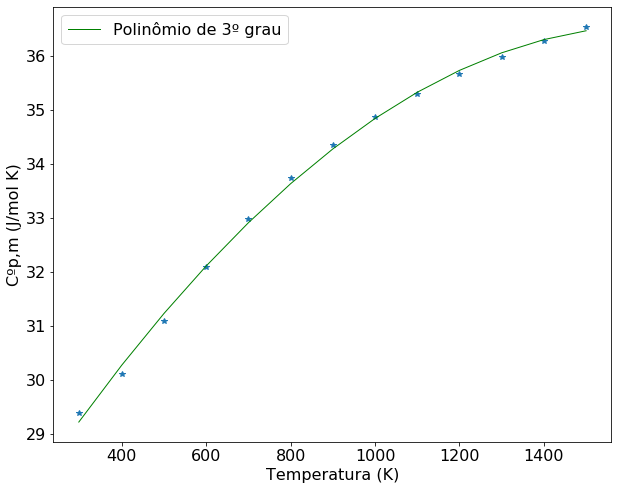

In [3]:
plt.rcParams.update({'font.size': 16}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(10,8))

#plota os valores informados no enunciado na forma de pontos
plt.plot(T,Cp,'*')
#plota o polinômio ajustado como uma linha
plt.plot(T,y(T), color='green', linewidth=1, label='Polinômio de 3º grau')
#definição da legenda dos eixos
plt.xlabel('Temperatura (K)')
plt.ylabel('Cºp,m (J/mol K)')
#Mostra a legenda de cada curva
plt.legend(loc='best') 
#mostra o gráfico
plt.show

<font size = "4"> Em seguida será ajustada a função $Cº_{p,m} = A + BT + CT^2 + D/T^2 $ aos dados do problema. Neste caso é preciso definir a função segundo a sintaxe do Python e em seguida usar a função *curve_fit()* para ajustar a função desejada aos dados do problema. <font>

In [4]:
# Definir a função que será ajustada
def func(T, a, b, c, d):

    return a + b*T + c*T**2 + d/T**2

# ajuste da função usando mínimos quadrados
# popt são os parâmetros do modelo obtidos após ajuste
# pcov é a matriz de covariância de popt. A partir dela pode ser calculado o desvio padrão de cada parâmetro do ajuste
popt, pcov = curve_fit(func, T, Cp)


print('Cºp,m = ' + format(popt[0] , ' 6.3e') + ' +' + format(popt[1] , ' 6.3e') + 'T ' + format(popt[2] , ' 6.3e') + 'T²  +' + format(popt[3] , ' 6.5e') + '/T²')   

#imprimir só os coeficientes na forma de vetor
print("Coeficientes da função", popt)

Cºp,m =  2.483e+01 + 1.456e-02T -4.560e-06T²  + 4.90797e+04/T²
Coeficientes da função [ 2.48294824e+01  1.45554447e-02 -4.55956846e-06  4.90796782e+04]


<font size ="4"> Novamente construiremos o gráfico de Cp versus T com os dados do enunciado e a equação ajustada.É possível perceber que ambas funções se ajustam bem aos dados do problema e que não é possível fazer uso de uma equação de primeiro grau para representar os dados fornecidos. A superposição das curvas confirma a similaridade dos modelos ajustados e que a escolha de uma função ou outra dependerá do problema em questão e das operações matemáticas que serão realizadas posteriormente. <font> 

<function matplotlib.pyplot.show(*args, **kw)>

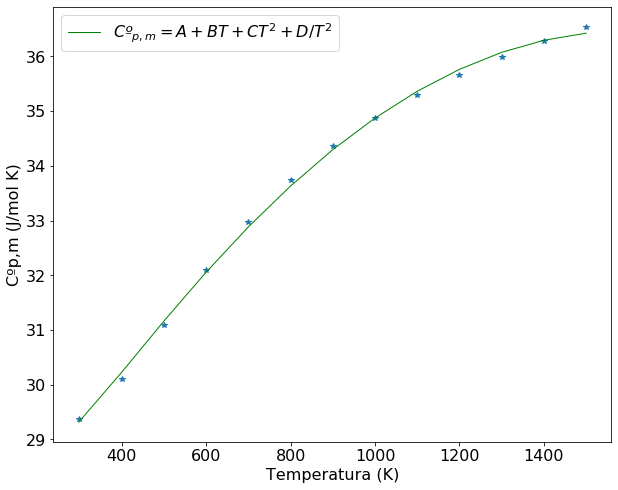

In [5]:
plt.rcParams.update({'font.size': 16}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(10,8))

plt.plot(T,Cp,'*')
#gráfico da função ajustada. O argumento *popt informa que serão usados todos os coeficientes da
# equação que foi ajustada
plt.plot(T,func(T, *popt), color='green', linewidth=1,label='$Cº_{p,m} = A + BT + CT^2 + D/T^2 $')
plt.xlabel('Temperatura (K)')
plt.ylabel('Cºp,m (J/mol K)')
#Mostra a legenda de cada curva
plt.legend(loc='best') 
plt.show

<font size ="4">Superposição dos resultados para fins de comparação.<font>

<function matplotlib.pyplot.show(*args, **kw)>

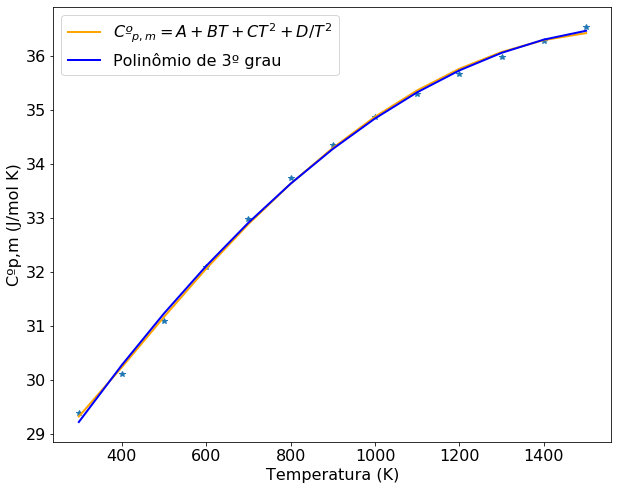

In [6]:

plt.rcParams.update({'font.size': 16}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(10,8))

plt.plot(T,Cp,'*')
plt.plot(T,func(T, *popt), color='orange', linewidth=2, label='$Cº_{p,m} = A + BT + CT^2 + D/T^2 $')
plt.plot(T,y(T), color='blue', linewidth=2, label='Polinômio de 3º grau')
plt.xlabel('Temperatura (K)')
plt.ylabel('Cºp,m (J/mol K)')
#Mostra a legenda de cada curva
plt.legend(loc='best') 
plt.show

## Exercício 2: Calculando entropias da terceira Lei

<font size ="4">Gráficos de Cp/T versus T são usados para determinar a entropia de um material, uma vez que o valor de entropia é igual a área sob a curva. A tabela abaixo apresenta a variação de Cp do $Na_2SO_4$ em função da temperatura. a) Ajuste um polinômio de terceira ordem que passa pela origem aos dados fornecidos e calcule a entropia do $Na_2SO_4$ a 90 K. b) Em baixas temperaturas é possível ajustar uma função do tipo aT³ aos valores de Cp/T (“a” é uma constante). Investigue em qual intervalo de temperaturas esta aproximação é válida. c) Ajuste uma função do tipo $ Cº_{p,m} = A + BT + CT^2 + \frac{D}{T^2} $ e calcule a entropia a 90 K. d) Ajuste uma função do tipo $ Cº_{p,m} = A + BT + CT^2 + DT^3 $ e calcule a entropia a 90 K. Compare os ajustes dos itens (c) e (d).

|   |   |   |   |   |   |   |   |   |  
|---|---|---|---|---|---|---|---|---|
|Cp($cal ~ K^{-1}$ )|0.171|0.286|0.626|1.615|4.346|7.032|10.48|13.28|15.33
|T(K)|13.74|16.25|20.43|27.73|41.11|52.72|68.15|82.96|95.71 <font>


### Solução (a)

<font size = "4"> Vamos ajustar a função informada no item **a** e em seguida calcular a entropia resolvendo   $ dS = \frac{Cp}{T} dT $ no intervalo de temperaturas informado. Para isto recorremos ao enunciado da terceira lei da termodinâmica: 
    
**Para qualquer processo isotérmico que envolve apenas substâncias em equilíbrio interno, a variação da entropia tende a zero à medida que T tende a zero:**

$$ \lim_{T \rightarrow 0} \Delta S = 0 $$
    
Desta forma podemos integrar de 0 K até 90 K, considerando que $S_0 = 0$ em T = 0 K para $Na_2 SO_4$. Neste intervalo de temperatura o $Na_2 SO_4$ se mantém sólido, desta forma não precisamos nos preocupar em levar em consideração as mudanças de fase do sistema. 

Os dados do problema serão inseridos na forma de vetores e a função polinomial que cruza a origem será definida segundo a sintaxe do Python. Posteriormente o método dos mínimos quadrados será usado para ajustar a função aos pontos do problema, assim como foi feito no primeiro exemplo. <font>

In [7]:
T = np.array([13.74,16.25,20.43,27.73,41.11,52.72,68.15,82.96,95.71])
Cp = np.array([0.171,0.286,0.626,1.615,4.346,7.032,10.48,13.28,15.33])

# Definir a função que será ajustada
def func(T, b, c, d):

    return b*T + c*T**2 + d*T**3

# ajuste da função usando mínimos quadrados
# popt são os parâmetros do modelo obtidos após ajuste
# pcov é a matriz de covariância de popt. A partir dela pode ser calculado o desvio padrão de cada parâmetro do ajuste
popt, pcov = curve_fit(func, T, Cp)


print('Cºp,m = ' + format(popt[0] , ' 6.3e') + 'T  +' + format(popt[1] , ' 6.3e') + 'T² ' + format(popt[2] , ' 6.5e') + 'T³')   

#imprimir só os coeficientes na forma de vetor
popt

Cºp,m = -5.746e-02T  + 5.167e-03T² -3.03363e-05T³


array([-5.74633196e-02,  5.16679456e-03, -3.03363216e-05])

<font size = "4"> O gráfico do ajuste mais os pontos do problema será construído para verificarmos se a função representa de forma adequada os dados experimentais. Em seguida será definida uma função para o resultado da divisão $\frac{Cp(T)}{T}$. Esta nova função será integrada de 0 K até 90 K usando a função *quad()*. 


<function matplotlib.pyplot.show(*args, **kw)>

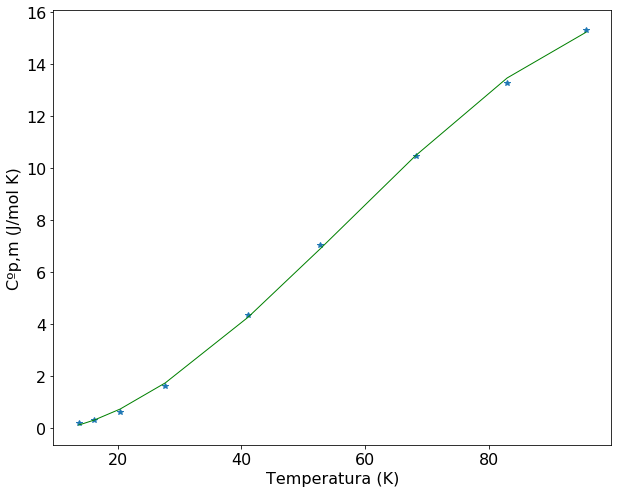

In [8]:
plt.rcParams.update({'font.size': 16}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(10,8))

plt.plot(T,Cp,'*')
plt.plot(T,func(T, *popt), color='green', linewidth=1)
plt.xlabel('Temperatura (K)')
plt.ylabel('Cºp,m (J/mol K)')
plt.show

In [9]:
# Fazendo a integração no intervalo desejado
#Definição da função Cp(T)/T

def func(T):

    return popt[0] + popt[1]*T + popt[2]*T**2

ans, err = quad(func, 0, 90) #calcula a integral da função da acima e o erro da integração
print('Delta S (J/K mol)= ' + format(ans , '6.3f'))
print('erro da integração = ' + format(err, '6.3e'))

Delta S (J/K mol)=  8.382
erro da integração = 1.006e-13


### Solução (b)

<font size ="4"> Neste caso é preciso analisar o intervalo no qual o ajusto pedido é válido. Nós faremos um corte nos valores informados na forma de vetores, para criar uma nova lista reduzida de valores. A instrução T[:X], onde X é um número inteiro, faz a retirada dos X primeiros valores do vetor T e os armazena em uma nova variável, chamada de Ti. Em nossa resolução foram considerados os primeiros cinco valores de temperatura. Para que o ajuste possa ser feito, é preciso também extrair os primeiros cinco valores de Cp, caso contrário não será possível proceder com o ajuste de funções a criação de gráficos. O leitor é incentivado a testar outros intervalos e avaliar a variação do desvio padrão calculado e precisão do ajuste. O desvio padrão deste ajuste foi calculado como a raíz quadrada da diagonal da matriz de covariância.  <font>

a= 6.383e-05
desvio padrão do ajuste = 1.919e-06


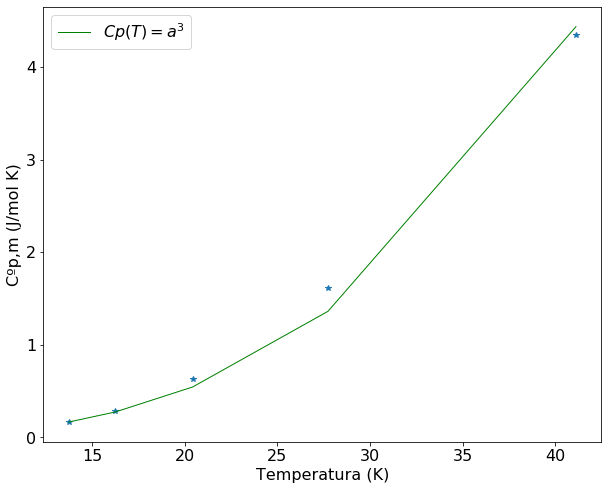

In [10]:
#Corte nos valores iniciais de Cp e T
#Foram tomados apenas os primeiros 5 valores

Ti = T[:5] 
Cpi = Cp[:5]

# Definir a função que será ajustada
def func(Ti, a):

    return a*Ti**3

a, pcov = curve_fit(func, Ti, Cpi) # faz o ajuste do modelo

perr = np.sqrt(np.diag(pcov)) # calcula o desvio padrão do modelo

#imprimir só os coeficientes na forma de vetor
print('a= ' + format(a[0] , '6.3e'))
print('desvio padrão do ajuste = ' + format(perr[0], '6.3e'))

plt.rcParams.update({'font.size': 16}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(10,8))

plt.plot(Ti,Cpi,'*')
#Gráfico da função
plt.plot(Ti,func(Ti, *a), color='green', linewidth=1, label='$Cp(T)=a^3$')
plt.xlabel('Temperatura (K)')
plt.ylabel('Cºp,m (J/mol K)')
plt.legend(loc='best') 
plt.show()

<font size = "4"> A análise do gráfico e desvio padrão mostra que a função $aT^3$ se ajusta bem aos primeiros 5 valores de $C_p$. A equação $C_p = aT^3$, que define a dependência da capacidade calorífica com a temperatura em valores muito baixos de T, é denominado de **Lei de Debye**. Esta equação é válida para sólidos não metálicos, pois para sólidos metálicos a temperaturas póximas de 0K é válida a relação $C_p \sim C_V = aT^3 + bT$. <font>

### Solução conjunta dos itens (c) e (d)

<font size = "4"> Primeiramente será ajustada a função $ Cº_{p,m} = A + BT + CT^2 + \frac{D}{T^2} $ e calculado $\Delta S $ em 90 K.O procedimento adotado será o mesmo de exemplos anteriores: 1) definição da função a ser ajustada; 2) ajuste da função por mínimos quadrados; 3) definição da função Cp/T; 4) integração da função Cp/T usando a função *quad()*. <font>

In [11]:
# Considerando a primeira função


# Definir a função que será ajustada
def func(T, a, b, c, d):

    return a + b*T + c*T**2 + d/T**2

# ajuste da função usando mínimos quadrados
# popt são os parâmetros do modelo obtidos após ajuste
# pcov é a matriz de covariância de popt. A partir dela pode ser calculado o desvio padrão de cada parâmetro do ajuste
popt, pcov = curve_fit(func, T, Cp)


print('Cºp,m = ' + format(popt[0] , ' 6.3e') + ' +' + format(popt[1] , ' 6.3e') + 'T ' + format(popt[2] , ' 6.3e') + 'T²  +' + format(popt[3] , ' 6.5e') + '/T²')   


#Definição da função Cp/T
def func(T):

    return popt[0]/T + popt[1] + popt[2]*T + popt[3]/T**3

#integração da função Cp/T
ans, err = quad(func, 0, 90)

print('Delta S (J/K mol)= ' + format(ans , '6.3f'))
print('erro da integração = ' + format(err, '6.3e'))

Cºp,m = -6.436e+00 + 2.829e-01T -5.728e-04T²  + 5.61810e+02/T²
Delta S (J/K mol)= -36.947
erro da integração = 2.677e+01


<ipython-input-11-900a5a636b92>:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  ans, err = quad(func, 0, 90)


<font size ="4"> Perceba que o resultado é muito diferente do obtido no item **a** e que um aviso foi dado pelo sistema de que a integral é divergente ou tem convergência demorada. <font>

<font size ="4"> Agora será ajustado um polinômio do terceiro grau e cálculado $\Delta S$.  

In [12]:
# Considerando o polinômio do terceiro grau


deg = 3
z = np.polyfit(T, Cp, deg)
y = np.poly1d(z)


print('Cºp,m = ' + format(z[3] , ' 6.5f') + format(z[2] , ' 6.5f') + 'T + ' + format(z[1] , ' 6.5e') + 'T² ' + format(z[0] , ' 6.5e') + 'T³')   

#imprimir só os coeficientes na forma de vetor
print(z)
print()


def func(T):
    
     return y/T # Para simplificar foi usado o polinômio y para definir a função Cp/T
    
#    return z[3]/T + z[2] + z[1]*T + z[0]*T**2 esta seria uma segunda alternativa para definir a função

ans, err = quad(y, 0, 90)

print('Delta S (J/K mol)= ' + format(ans , '6.3f'))
print('erro da integração = ' + format(err, '6.3e'))

Cºp,m = -0.20558-0.04189T +  4.85438e-03T² -2.85176e-05T³
[-2.85176338e-05  4.85438172e-03 -4.18860690e-02 -2.05576078e-01]

Delta S (J/K mol)= 523.714
erro da integração = 5.879e-12


<font size ="4">Os três valores de entropia calculados nos itens (a), (c) e (d) diferem quanto ao valor e sinal. Não havendo acordo entre os métodos empregados. Era de se esperar que os três resultados apresentassem uma pequena diferença e não o desacordo observado. O erro ocorre porque as funções utilizadas nos itens (c) e (d) apresentam uma indeterminação na origem, o que levará a problemas de integração. Nestes casos, a integral deve ser separada em dois intervalos:

$$ \Delta Sº = \int_{0}^{90} \frac{C_p}{T} dT = \int_{0}^{T_{baixa}} \frac{C_p}{T} dT + \int_{T_{baixa}}^{90} \frac{C_p}{T} dT $$

Como visto no item (b), Cp pode ser ajustado a uma função do tipo $ aT^3$, de forma que a integração se torna:  

$$ \Delta Sº = \int_{0}^{T_{baixa}} \frac{aT^3}{T} dT + \int_{T_{baixa}}^{90} \frac{C_p}{T} dT $$ 

ou 

$$ \Delta Sº = \frac{aT^3}{3} + \int_{T_{baixa}}^{90} \frac{C_p}{T} dT = \frac{C_p}{3} + \int_{T_{baixa}}^{90} \frac{C_p}{T} dT$$ 

Onde $C_p$ da primeira integral da direita se refere ao valor da capacidade calorífica em $T_{baixa}$. Em nosso caso, é maior valor T para o qual é válido o ajuste da função aT³ usada no item (c).
Vamos resolver os problemas com as modificações necessárias.  <font>

In [13]:
# Considerando a função Cp = aT^3 em temperaturas baixas
# Não é preciso refazer o ajuste, pois os coeficientes já estão salvos.

#Definição da função Cp/T = aT^3/T

def func1(T):

    return a[0]*T**2

ans1, err1 = quad(func1, 0, 40)


def func2(T):

    return popt[0]/T + popt[1] + popt[2]*T + popt[3]/T**3

ans2, err2 = quad(func2, 40, 90)

DS = ans1 + ans2
erro = err1 + err2

print('Delta S (J/K mol)= ' + format(DS , '6.3f'))
print('erro da integração = ' + format(erro, '6.3e'))

Delta S (J/K mol)=  8.565
erro da integração = 9.509e-14


In [14]:
# Considerando a função Cp = aT^3 em temperaturas baixas
# Não é preciso refazer o ajuste, pois os coeficientes já estão salvos.
# Esta primeira integração não precisa ser repetida, pois os resultado será o mesmo. 
#Mas calcularemos de novo a integral para fixar a necessidade da separação dos cálculos

def func1(T):

    return a[0]*T**2

ans1, err1 = quad(func1, 0, 40)


def func2(T):

    return z[3]/T + z[2] + z[1]*T + z[0]*T**2

ans2, err2 = quad(func2, 40, 90)


DS = ans1 + ans2
erro = err1 + err2

print('Delta S (J/K mol)= ' + format(DS , '6.3f'))
print('erro da integração = ' + format(erro, '6.3e'))

Delta S (J/K mol)=  8.556
erro da integração = 9.499e-14


<font size = "4">Verifiquem que o resultado dos itens (a), (c) e (d) são similares. Novamente, a escolha do modelo matemático dependerá dos cálculos que pretende realizar e as propriedades que pretende calcular. <font>